In [1]:
from bs4 import BeautifulSoup
import urllib
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import plotly
import plotly.plotly as py
import textstat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
import bokeh

### Read Inauguration Speaches

In [3]:
# Load data
Obama_page = urllib.urlopen("https://en.wikisource.org/wiki/Barack_Obama's_First_Inaugural_Address").read()
Obama_soup = BeautifulSoup(Obama_page, "lxml")

Obama_Address = []
for text in Obama_soup.findAll('p'):
       Obama_Address.append(text.getText())
        
# Load data
Trump_page = urllib.urlopen("http://abcnews.go.com/Politics/full-text-president-donald-trumps-inauguration-speech/story?id=44915821").read()
Trump_soup = BeautifulSoup(Trump_page, "lxml")

Trump_Address = []
for text in Trump_soup.findAll('p'):
       Trump_Address.append(text.getText())

### Clean and Transform Data

In [4]:
#Trump Cleaning
Trump_Address2 = ' '.join(Trump_Address)
Trump_temp = Trump_Address2.split('-')[-1]
temp = Trump_temp.split(' ')

Trump_final = [item for item in temp if item != '\n']
Trump_final = ' '.join(Trump_final)
Trump_Address_Blob = TextBlob(Trump_final)
Trump_sentences = Trump_Address_Blob.sentences

Trump_sentiments = []

for sentence in Trump_sentences:
    Trump_sentiments.append(sentence.sentiment.polarity)

#Obama Cleaning
Obama_Address2 = ' '.join(Obama_Address)
Obama_temp = Obama_Address2.split(' ')

Obama_temp1 = [item for item in Obama_temp if item != '\u2014']
Obama_temp2 = [item for item in Obama_temp1 if item != '']

Obama_final = ' '.join(Obama_temp2)

Obama_Address_Blob = TextBlob(Obama_final)
Obama_sentences = Obama_Address_Blob.sentences

Obama_sentiments = []

for sentence in Obama_sentences:
    Obama_sentiments.append(sentence.sentiment.polarity)

### Organize Data

In [8]:
Trump_x = np.linspace(0,len(Trump_sentiments), len(Trump_sentiments))
Obama_x = np.linspace(0,len(Obama_sentiments), len(Obama_sentiments))

scaler = MinMaxScaler(feature_range=(0,1))
Trump_x_scaled = scaler.fit_transform(Trump_x)
Obama_x_scaled = scaler.fit_transform(Obama_x)
df_Trump = pd.DataFrame({'Pct Complete': Trump_x_scaled,'Sentiment (Sentence Level Polarity)': Trump_sentiments})
df_Trump.head()

,Pct Complete,Sentiment (Sentence Level Polarity)
0,0.000000,0.0
1,0.010526,0.8
2,0.021053,0.5
3,0.031579,0.0
4,0.042105,0.0


### Calculate Average Word Length

In [5]:
Trump_words = Trump_Address_Blob.words
Trump_Count_Word = []
for word in Trump_words:
    Trump_Count_Word.append(len(word))
   
print 'Trump: ', np.mean(Trump_Count_Word)

Obama_words = Obama_Address_Blob.words
Obama_Count_Word = []
for sentence in Obama_words:
    Obama_Count_Word.append(len(word))
   
print 'Obama: ', np.mean(Obama_Count_Word)

Trump:  4.59590443686
Obama:  7.0


### Calculate Average Sentence Length

In [10]:
Trump_Count_Sentence = []
for sentence in Trump_sentences:
    temp = sentence.split(' ')
    Trump_Count_Sentence.append(len(temp))
   
print 'Trump: ', np.mean(Trump_Count_Sentence)

Obama_Count_Sentence = []
for sentence in Obama_sentences:
    temp = sentence.split(' ')
    Obama_Count_Sentence.append(len(temp))sadfjk
   
print 'Obama: ', np.mean(Obama_Count_Sentence)

Trump:  15.1458333333
Obama:  22.0366972477


### Plot Comparison and Display Key Information

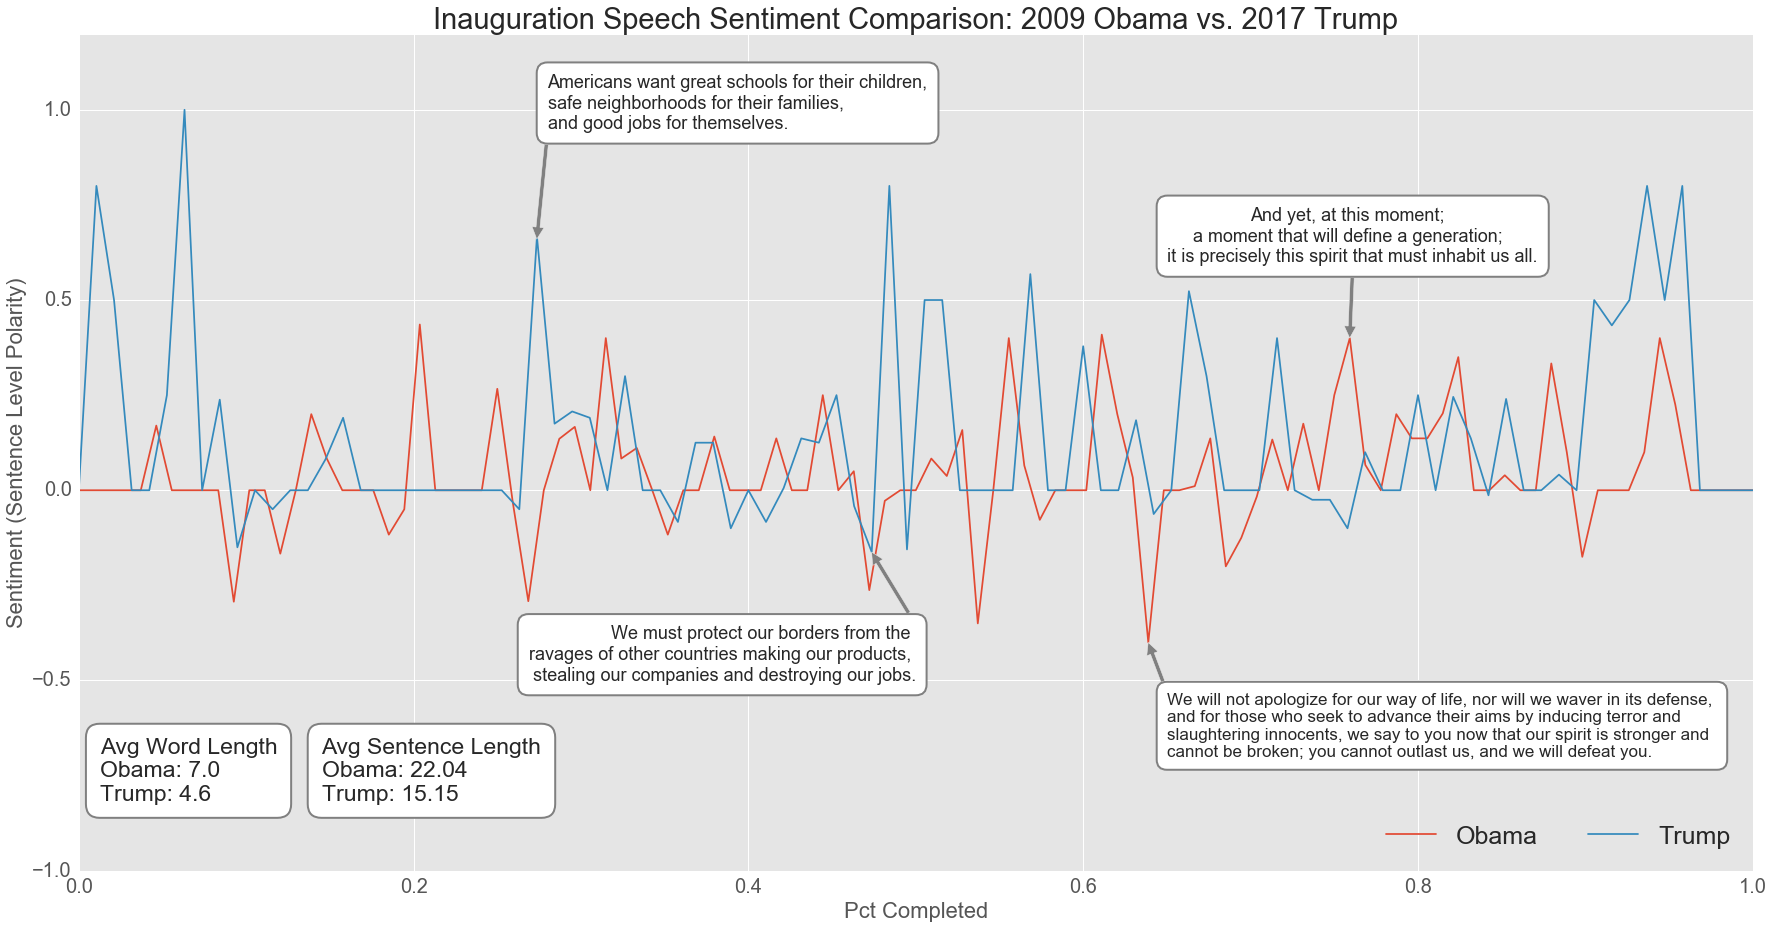

In [165]:
with plt.style.context('ggplot'): 
    fig = plt.figure(figsize=(30,15))
    plt.plot(Obama_x_scaled,Obama_sentiments, label = 'Obama')
    plt.plot(Trump_x_scaled,Trump_sentiments, label = 'Trump')
    plt.title('Inauguration Speech Sentiment Comparison: 2009 Obama vs. 2017 Trump', fontsize = 29)
    plt.ylabel('Sentiment (Sentence Level Polarity)', fontsize = 22)
    plt.xlabel('Pct Completed', fontsize = 22)
    plt.ylim([-1.0,1.2])
    plt.tick_params(axis='both', which='major', labelsize=20)
    leg = plt.legend(loc='lower right',
           ncol=3,
           fontsize=25,
            fancybox=True)
    leg.get_frame().set_facecolor('white')
    leg.get_frame().set_edgecolor('grey')
    bbox_props = dict(boxstyle="round",fc = 'w',ec = 'grey',pad = 0.6, lw=2)
    plt.text(0.0125, -0.65, "Avg Word Length\nObama: "+str(round(np.mean(Obama_Count_Word),2))+"\nTrump: "+str(round(np.mean(Trump_Count_Word),2)), \
            ha="left", va="top", size=23,bbox=bbox_props)
    plt.text(0.145, -0.65, "Avg Sentence Length\nObama: "+str(round(np.mean(Obama_Count_Sentence),2))+"\nTrump: "+str(round(np.mean(Trump_Count_Sentence),2)),\
             ha="left", va="top", size=23,bbox=bbox_props)
    
    plt.annotate('Americans want great schools for their children,\nsafe neighborhoods for their families,\nand good jobs for themselves.', 
                 xy=(0.2736, 0.66), xytext=(0.28, 0.95),bbox = bbox_props,size = 18,
                arrowprops=dict(facecolor='grey'))
    plt.annotate('We will not apologize for our way of life, nor will we waver in its defense, \nand for those who seek to advance their aims by inducing terror and \nslaughtering innocents, we say to you now that our spirit is stronger and \ncannot be broken; you cannot outlast us, and we will defeat you.', 
                 xy=(0.6388, -0.4), xytext=(0.65, -0.7),bbox = bbox_props,size = 17,
                arrowprops=dict(facecolor='grey'))
    plt.annotate("And yet, at this moment;  \na moment that will define a generation;  \nit is precisely this spirit that must inhabit us all.", 
                horizontalalignment='center', xy=(0.7592, 0.4), xytext=(0.761, 0.6),bbox = bbox_props,size = 18,
                arrowprops=dict(facecolor='grey'))
    plt.annotate("We must protect our borders from the \nravages of other countries making our products, \nstealing our companies and destroying our jobs.", 
                horizontalalignment='right', xy=(0.4736, -0.1625), xytext=(0.5, -0.50),bbox = bbox_props,size = 18,
                arrowprops=dict(facecolor='grey'))
    plt.savefig('Final_Plot.jpg', format='jpg', dpi=500)

    plt.show()
